# Probability

Probability is a way to quantify the uncertainty associated with events chosen from a some universe of events. 

> The laws of probability, so true in general, so fallacious in particular.
—Edward Gibbon

P(E) means “the probability of the event E.”

We’ll use probability theory to build and evaluate models. 

# Dependence and Independence
Roughly speaking, we say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise they are independent.

When two events E and F are independent, then by definition we have:

$$P(E,F) =P(E)P(F)$$

# Conditional Probability

we define the probability of E conditional on F as:

$$ P(E \mid F) = \frac{P(E,F)} {P(F)} $$


We often rewrite this as:

$$ P(E,F) = P(E \mid F) P(F) $$


When E and F are independent:

$$ P(E \mid F)=P(E)$$

F occurred gives us no additional information about whether E occurred.

- Each child is equally likely to be a boy or a girl.
- The gender of the second child is independent of the gender of the first child

- the event “no girls” has probability 1/4, 
- the event “one girl, one boy” has probability 1/2, 
- the event “two girls” has probability 1/4.

$$P(B, G) = P(B)$$

The event B and G (“both children are girls and the older child is a girl”) is just the event B. 

- Once you know that both children are girls, it’s necessarily true that the older child is a girl.



The probability of the event “both children are girls” (B) conditional on the event “the older child is a girl” (G)

$$P(B \mid G) =\frac{P(B,G)}{P(G)} =\frac{P(B)}{P(G)} =1/2$$

The probability of the event “both children are girls” conditional on the event “at least one of the children is a girl” (L). 

$$P(B \mid L) =\frac{P(B,L)}{P(L)} =\frac{P(B)}{P(L)} =1/3$$

In [49]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3


P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


# Bayes’s Theorem

Using the definition of conditional probability twice tells us that:

$$P(E \mid F) =\frac{P(E,F)}{P(F)} =\frac{P(F \mid E)P(E)}{P(F)}$$

The complement of an event is the "opposite" of that event. 
- We write $E{}'$ for “not E” (i.e., “E doesn’t happen”),

The event F can be split into the two mutually exclusive events:
- “F and E”
- “F and not E.” 

$$P(F) =P(F,E) +P(F,E{}')$$

**Bayes’s Theorem** 

$$ P(E \mid F) = \frac{P(F \mid E) P(E)}{ P(F \mid E) P(E) + P(F E{}') P(E{}') }$$

** why data scientists are smarter than doctors. **

- Imagine a certain disease that affects 1 in every 10,000 people. 
- And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.

What does a positive test mean? 

Let’s use 
- T for the event “your test is positive” and 
- D for the event “you have the disease.” 

Then Bayes’s Theorem says that the probability that you have the disease, conditional on testing positive, is:

$$ P(D \mid T) = \frac{P(T \mid D) P(D)}{ P(T \mid D) P(D) + P(T D{}') P(D{}') }$$

Here we know that 

-  the probability that someone with the disease tests positive, $P(T \mid D) = 0.99$. 
- the probability that any given person has the disease, $P(D) = 1/10,000 = 0.0001$. 
- the probability that someone without the disease tests positive, $P(T \mid D{}') = 0.01$. 
- the probability that any given person doesn’t have the disease, $P(D{}')= 0.9999$. 

Question: Can you compute the probability of $P(D \mid T)$?

Joke: most doctors will guess that P D T is approximately 2.

If you substitute these numbers into Bayes’s Theorem, you find
$P(D \mid T) =0.98 \% $

That is, less than 1% of the people who test positive actually have the disease!!!

> This assumes that people take the test more or less at random. If only people with certain symptoms take the test we would instead have to condition on the event “positive test and symptoms” and the number would likely be a lot higher.

A more intuitive way to see this is to imagine a population of 1 million people. 
- You’d expect 100 of them to have the disease, and 99 of those 100 to test positive. 
- On the other hand, you’d expect 999,900 of them not to have the disease, and 9,999 of those to test positive. 
- Which means that you’d expect only 99 out of (99 + 9999) positive testers to actually have the disease.

# Random Variables

A random variable is a variable whose possible values have an **associated probability distribution**. 
- The associated distribution gives the probabilities that the variable realizes each of its possible values. 

    - The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5. 
    - The range(10) variable has a distribution that assigns probability 0.1 to each of the numbers from 0 to 9.

**The expected value of a random variable** is the average of its values weighted by their probabilities. 
- the range(10) variable has an expected value of 4.5.

In [15]:
import numpy as np
np.sum([int(i)*0.1 for i in range(10)])

4.5000000000000009

In [28]:
[i*0.1 for i in range(10)]

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [4]:
from collections import Counter
import math, random
import matplotlib.pyplot as plt # pyplot

def random_kid():
    return random.choice(["boy", "girl"])

In [5]:
random_kid()

'boy'

# Continuous Distributions
    

**Discrete distribution** associates positive probability with discrete outcomes. 
- A coin flip

Often we’ll want to model distributions across `a continuum of outcomes`. 
- **The uniform distribution** puts equal weight on `all the numbers between 0 and 1`.

> Because there are infinitely many numbers between 0 and 1, this means that the weight it assigns to individual points must necessarily be zero. 

The continuous distribution can be described with a **probability density function** (pdf)
- the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [3]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

uniform_pdf(2)

0

The probability that a random variable following that distribution is between 0.2 and 0.3 is 1/10

**The cumulative distribution function (cdf)** gives the probability that a random variable is less than or equal to a certain value.

In [2]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

    
uniform_cdf(0.5)

0.5

In [3]:
uniform_cdf(0.3) - uniform_cdf(0.2)

0.09999999999999998

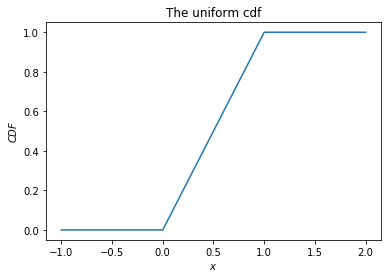

In [25]:
x = [(i-10)*10/100 for i in range(31)]
y = [uniform_cdf(i) for i in x]

plt.plot(x, y)
plt.title('The uniform cdf')
plt.xlabel('$x$')
plt.ylabel('$CDF$')
plt.show()

# The Normal Distribution
The normal distribution is the king of distributions. 

- It is the classic bell curve–shaped distribution
- It is completely determined by two parameters: its mean **μ** (mu) and its standard deviation **σ** (sigma). 
    - The mean indicates where the bell is centered
    - the standard deviation how “wide” it is.

The probability density of the normal distribution is

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
$$

where
* $\mu$ is the mean or expectation of the distribution (and also its median and mode),
* $\sigma$ is the standard deviation, and
* $\sigma^2$ is the variance.

In [6]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

normal_pdf(5,5)

0.3989422804014327

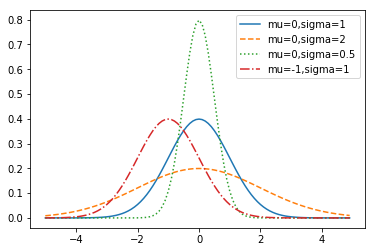

In [9]:
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()

plot_normal_pdfs(plt)   

In [11]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


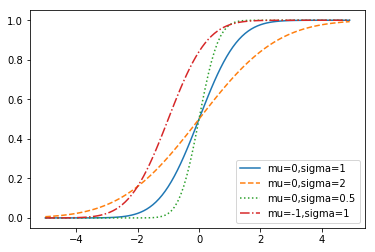

In [12]:
def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()
    
plot_normal_cdfs(plt)    

To invert normal_cdf to find the Z value corresponding to a specified probability. 

- There’s no simple way to compute its inverse, 
- but normal_cdf is continuous and strictly increasing, 
    - so we can use a binary search:

In [15]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [43]:
inverse_normal_cdf(p = 0)

-8.75

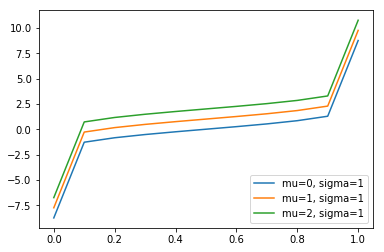

In [35]:
ps = [p/ 10.0 for p in range(11)]
plt.plot(ps,[inverse_normal_cdf(p,mu=0, sigma=1) for p in ps],'-',label='mu=0, sigma=1')
plt.plot(ps,[inverse_normal_cdf(p,mu=1, sigma=1) for p in ps],'-',label='mu=1, sigma=1')
plt.plot(ps,[inverse_normal_cdf(p,mu=2, sigma=1) for p in ps],'-',label='mu=2, sigma=1')

plt.legend(loc=4) # bottom right
plt.show()

# The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem

> A random variable defined as the **average** of a large number of _independent and identically distributed (IID)_ random variables is itself approximately normally distributed.

In particular, if $x_1$, ..., $x_n$ are random variables with mean μ and standard deviation σ, and if n is large, then:

$$
\frac{1}{n}(x_1 +... +x_n)
$$

is is approximately normally distributed with mean $\mu$ and standard deviation $\sigma/ \sqrt{n}$.

$ \frac{(x_1 +... +x_n) - \mu n}{\sigma \sqrt{n}} $ is approximately normally distributed with mean 0 and standard deviation 1.


In [45]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0


def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli($p$) variable is $p$, and its standard deviation is
$\sqrt{p(1-p)}$

Central limit theorem says that as $n$ gets large, 

a Binomial(n,p) variable is approximately a normal random variable 
- with mean $\mu=np$ and 
- the standard deviation $\sigma = \sqrt{np(1-p)}$


In [46]:
def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8, color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()


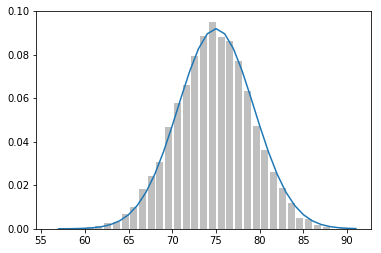

In [47]:
make_hist(0.75, 100, 10000)

scipy.stats contains pdf and cdf functions for most of the popular probability distributions.